<a href="https://colab.research.google.com/github/barcellfe/datascience_study/blob/master/Aula_06_11_2020_PandasIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 06-11-2020 / Séries Temporais

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
##Duas estruturas de Pandas

#pd.Series([])

#pd.DataFrame({}, index = [], columns = [])

In [ ]:
names1880 = pd.read_csv('yob1880.txt', sep = ',', 
                        names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [ ]:
names1880.columns

Index(['name', 'sex', 'births'], dtype='object')

In [ ]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [ ]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [ ]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [ ]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [ ]:
7065/90993

0.07764333520160892

In [ ]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


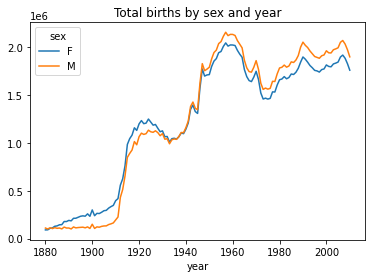

In [ ]:
total_births.plot(title='Total births by sex and year')

In [ ]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [ ]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [ ]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
    
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [ ]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [ ]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [ ]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [ ]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,Abbott,Abby,Abdiel,Abdul,Abdullah,Abe,Abel,Abelardo,Abigail,Abigale,Abigayle,Abner,Abraham,Abram,Abril,Ace,Acie,Ada,Adah,Adalberto,Adaline,Adalyn,Adalynn,Adam,Adamaris,Adams,Adan,Adda,Addie,...,Zayne,Zeb,Zebulon,Zechariah,Zed,Zeke,Zela,Zelda,Zelia,Zella,Zelma,Zelpha,Zena,Zenas,Zenia,Zennie,Zeno,Zenobia,Zeta,Zetta,Zettie,Zhane,Zigmund,Zillah,Zilpah,Zilpha,Zina,Zion,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,year
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,6.0,NaN,NaN,NaN,50.0,9.0,NaN,12.0,NaN,NaN,27.0,81.0,21.0,NaN,NaN,NaN,652.0,24.0,NaN,23.0,NaN,NaN,104.0,NaN,NaN,NaN,14.0,282.0,...,NaN,10.0,NaN,NaN,NaN,6.0,NaN,6.0,NaN,31.0,19.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,1880
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,7.0,NaN,NaN,NaN,36.0,12.0,NaN,8.0,NaN,NaN,30.0,86.0,30.0,NaN,NaN,6.0,628.0,29.0,NaN,18.0,NaN,NaN,116.0,NaN,NaN,NaN,20.0,294.0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,17.0,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,7.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,1881
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,11.0,NaN,NaN,NaN,50.0,10.0,NaN,14.0,NaN,NaN,32.0,91.0,25.0,NaN,8.0,NaN,689.0,27.0,NaN,16.0,NaN,NaN,114.0,NaN,NaN,NaN,17.0,347.0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,50.0,21.0,NaN,6.0,NaN,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,1882
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12.0,NaN,11.0,NaN,NaN,27.0,52.0,20.0,NaN,6.0,NaN,778.0,41.0,NaN,11.0,NaN,NaN,107.0,NaN,NaN,NaN,24.0,369.0,...,NaN,13.0,NaN,NaN,NaN,6.0,NaN,NaN,5.0,55.0,16.0,NaN,13.0,NaN,NaN,NaN,6.0,5.0,NaN,15.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,1883
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,6.0,NaN,NaN,NaN,45.0,14.0,NaN,13.0,NaN,NaN,33.0,67.0,29.0,NaN,NaN,NaN,854.0,33.0,NaN,20.0,NaN,NaN,83.0,NaN,NaN,NaN,18.0,364.0,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,63.0,29.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.0,NaN,NaN,NaN,NaN,6.0,7.0,NaN,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,1884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,630.0,NaN,1682.0,NaN,NaN,219.0,NaN,922.0,NaN,15615.0,297.0,351.0,NaN,2200.0,414.0,316.0,240.0,NaN,397.0,NaN,NaN,NaN,NaN,NaN,6775.0,286.0,NaN,1098.0,NaN,NaN,...,196.0,NaN,NaN,336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1635.0,NaN,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN,2006
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,651.0,NaN,1573.0,NaN,NaN,224.0,NaN,939.0,NaN,15447.0,285.0,314.0,NaN,2139.0,463.0,736.0,279.0,NaN,460.0,NaN,NaN,NaN,316.0,NaN,6770.0,285.0,NaN,1080.0,NaN,NaN,...,201.0,NaN,NaN,362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2069.0,NaN,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN,2007
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,608.0,NaN,1328.0,199.0,NaN,210.0,NaN,863.0,NaN,15045.0,NaN,288.0,NaN,2143.0,477.0,585.0,322.0,NaN,520.0,NaN,NaN,NaN,576.0,328.0,6074.0,NaN,NaN,1110.0,NaN,NaN,...,267.0,NaN,NaN,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2027.0,NaN,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN,2008


In [ ]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [ ]:
total_births['year'] = total_births.index

In [ ]:
total_births.melt(id_vars='year')

,year,name,value
0,1880,Aaden,NaN
1,1881,Aaden,NaN
2,1882,Aaden,NaN
3,1883,Aaden,NaN
4,1884,Aaden,NaN
...,...,...,...
899703,2006,Zuri,NaN
899704,2007,Zuri,NaN
899705,2008,Zuri,NaN
899706,2009,Zuri,NaN


In [ ]:
total_births.sort_values(by = 'Aaron', ascending=False).Aaron

year
1989    15312.0
1981    14832.0
1983    14627.0
1990    14545.0
1982    14538.0
         ...   
1887       78.0
1902       78.0
1899       71.0
1896       69.0
1891       69.0
Name: Aaron, Length: 131, dtype: float64

In [ ]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [ ]:
subset = total_births[['Keanu', 'Elvis', 'Kennedy', 'Luke', 'Leah', 'John', 'Paul', 'Scarlet', 'Lisa', 'Rihanna',
                       'Brad', 'Tom']]
subset

name,Keanu,Elvis,Kennedy,Luke,Leah,John,Paul,Scarlet,Lisa,Rihanna,Brad,Tom
year,,,,,,,,,,,,
1880,NaN,NaN,NaN,43.0,54.0,9701.0,301.0,NaN,NaN,NaN,5.0,399.0
1881,NaN,8.0,NaN,42.0,52.0,8795.0,291.0,NaN,NaN,NaN,NaN,349.0
1882,NaN,NaN,NaN,44.0,56.0,9597.0,397.0,NaN,NaN,NaN,NaN,390.0
1883,NaN,NaN,NaN,38.0,65.0,8934.0,358.0,NaN,NaN,NaN,NaN,392.0
1884,NaN,NaN,NaN,39.0,79.0,9427.0,422.0,NaN,NaN,NaN,NaN,394.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,273.0,2898.0,10071.0,4639.0,15140.0,3016.0,318.0,604.0,571.0,213.0,NaN
2007,NaN,355.0,3051.0,9589.0,4534.0,14405.0,2753.0,403.0,523.0,787.0,206.0,NaN
2008,NaN,324.0,2945.0,9392.0,5604.0,13273.0,2547.0,474.0,506.0,1069.0,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f17b7a52240>,
      dtype=object)

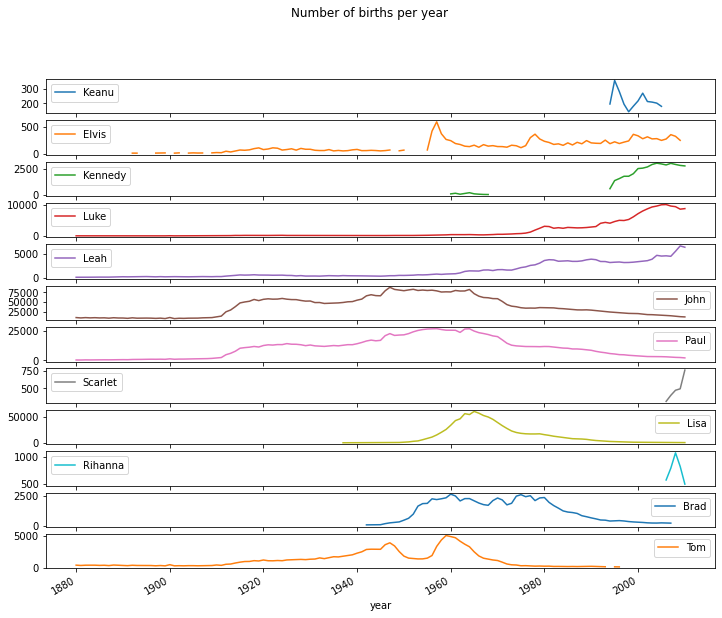

In [ ]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

In [ ]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)

table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


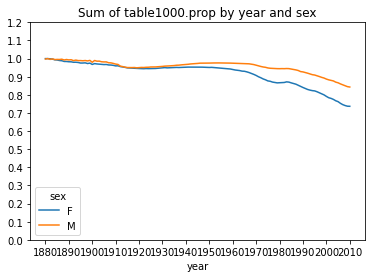

In [ ]:
import numpy as np
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [ ]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [ ]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5)

116

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

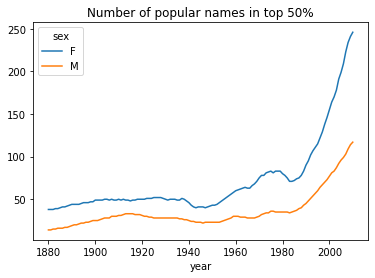

In [ ]:
#diversity.head()
diversity.plot(title="Number of popular names in top 50%")

In [ ]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [ ]:
table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)
table

sex                F                    ...         M                    
year            1880     1881     1882  ...      2008      2009      2010
last_letter                             ...                              
a            31446.0  31581.0  36536.0  ...   32901.0   31430.0   28438.0
b                NaN      NaN      NaN  ...   39945.0   38862.0   38859.0
c                NaN      NaN      5.0  ...   25318.0   24048.0   23125.0
d              609.0    607.0    734.0  ...   47910.0   46172.0   44398.0
e            33378.0  34080.0  40399.0  ...  140966.0  135496.0  129012.0
f                NaN      NaN      NaN  ...    2195.0    2212.0    2255.0
g                7.0      5.0     12.0  ...    2059.0    2396.0    2666.0
h             4863.0   4784.0   5567.0  ...  100250.0   99979.0   98090.0
i               61.0     78.0     81.0  ...   38151.0   40912.0   42956.0
j                NaN      NaN      NaN  ...    1381.0    1416.0    1459.0
k               13.0     15.0     11.0  ...   39563.0   37507.0   35198.0
l             2541.0   2911.0   3527.0  ...  150791.0  143751.0  133583.0
m               58.0     57.0     81.0  ...   44316.0   46278.0   46808.0
n             3008.0   2959.0   3576.0  ...  733869.0  715388.0  688677.0
o               30.0     49.0     35.0  ...   91485.0   86423.0   81025.0
p                NaN      NaN      NaN  ...    2637.0    2595.0    2409.0
q                NaN      NaN      NaN  ...     339.0     377.0     342.0
r              481.0    417.0    590.0  ...  174632.0  173200.0  166064.0
s             1391.0   1316.0   1637.0  ...  137056.0  129861.0  123670.0
t             2152.0   2165.0   2399.0  ...   43846.0   43674.0   43398.0
u              380.0    427.0    410.0  ...    2405.0    2417.0    2318.0
v                NaN      NaN      NaN  ...    2418.0    2589.0    2723.0
w                NaN      5.0      NaN  ...   36937.0   33181.0   30656.0
x                NaN      NaN      NaN  ...   14834.0   16640.0   16352.0
y            10469.0  10404.0  12145.0  ...  122633.0  112922.0  110425.0
z              106.0     95.0    106.0  ...    3473.0    3633.0    3476.0

[26 rows x 262 columns]

In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [ ]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

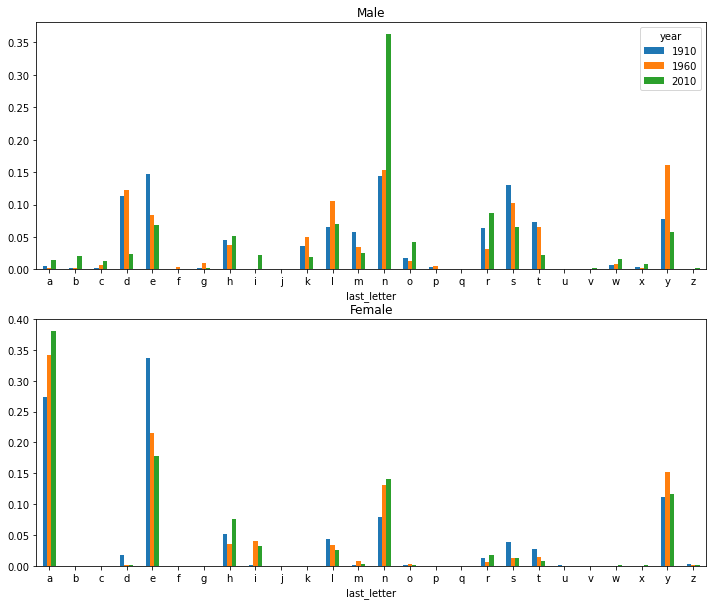

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [ ]:
plt.subplots_adjust(hspace=0.25)

<Figure size 432x288 with 0 Axes>

In [ ]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [ ]:
plt.close('all')

<Figure size 432x288 with 0 Axes>

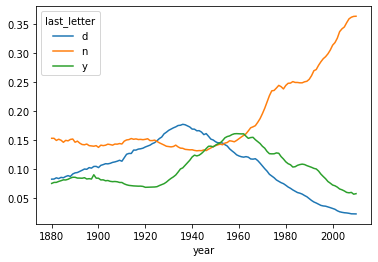

In [ ]:
fig = plt.figure()
dny_ts.plot()

In [ ]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('jean')]
lesley_like

202          Jean
206      Jeanette
266     Jeannette
492        Jeanne
2203       Jeanie
2236      Jeannie
3124     Jeanetta
3408        Jeane
3836     Jeannine
3838      Jeanine
4545       Jeanna
4681        Jeana
4740    Jeanmarie
dtype: object

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Jean         478209
Jeana          4814
Jeane          2624
Jeanetta       1190
Jeanette     160888
Jeanie        14916
Jeanine       21978
Jeanmarie       120
Jeanna         6420
Jeanne       161076
Jeannette     67540
Jeannie       33691
Jeannine      22730
Name: births, dtype: int64

In [ ]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,NaN,1.0
2007,NaN,1.0
2008,NaN,1.0
2009,NaN,1.0
2010,NaN,1.0


In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

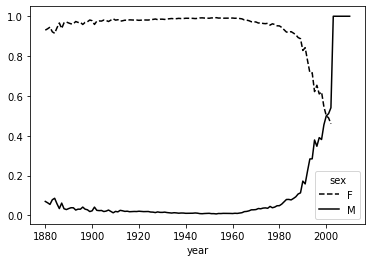

In [ ]:
table.plot(style={'M': 'k-', 'F': 'k--'})

In [ ]:
all_names[all_names.str.lower().str.contains('mari')]

54          Marie
130         Maria
136        Marion
204        Marian
345        Mariah
358      Marietta
844       Marilla
1929      Marinda
2072       Marius
2212       Mariam
2378     Marianna
2410    Marianita
3221        Mario
3225      Mariano
3270     Marianne
3456      Marilyn
3500    Rosemarie
3681     Marilynn
3691       Marina
3813      Marilou
3845      Marilee
3914      Mariann
3936       Marita
4018     Annmarie
4033    Annamarie
4101         Mari
4229     Maribeth
4288    Annemarie
4531       Marisa
4552      Maritza
4686      Maribel
4712      Marisol
4734     Maricela
4740    Jeanmarie
4741      Marissa
4965     Marisela
5053      Damaris
5393      Demario
5411        Omari
5446      Mariana
5460       Mariel
5825      Mariela
6146        Amari
6231       Jamari
6492      Omarion
6495      Amarion
6534       Amaris
6536     Jamarion
6540     Damarion
6544       Kamari
6557        Marin
6579     Demarion
6626       Damari
6647      Mariyah
6651     Adamaris
dtype: obj